In [1]:
import pandas as pd

In [2]:
emotion_df = pd.read_csv("emotion.csv")
emotion_df.head()

,movie_id,image_seq,angry,disgust,fear,happy,sad,surprise,neutral,dominant_emotion
0,dfb0d746-609f-4dac-8e1d-c0325fb64394,0,0.986249,1.054770e-04,3.882840,0.139500,5.511320,0.108728,89.371300,neutral
1,dfb0d746-609f-4dac-8e1d-c0325fb64394,1,2.081140,2.935960e-01,7.371850,76.190600,1.524340,7.602480,4.936020,happy
2,dfb0d746-609f-4dac-8e1d-c0325fb64394,2,9.438360,4.605680e-01,9.067420,71.409600,3.412750,5.922060,0.289199,happy
3,dfb0d746-609f-4dac-8e1d-c0325fb64394,3,4.378860,2.232070e-02,24.838800,14.193200,1.357880,31.498200,23.710700,surprise
4,dfb0d746-609f-4dac-8e1d-c0325fb64394,4,0.001452,1.465590e-07,0.936351,0.365306,0.004872,95.902500,2.789520,surprise


In [3]:
emotion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie_id          86 non-null     object 
 1   image_seq         86 non-null     int64  
 2   angry             86 non-null     float64
 3   disgust           86 non-null     float64
 4   fear              86 non-null     float64
 5   happy             86 non-null     float64
 6   sad               86 non-null     float64
 7   surprise          86 non-null     float64
 8   neutral           86 non-null     float64
 9   dominant_emotion  86 non-null     object 
dtypes: float64(7), int64(1), object(2)
memory usage: 6.8+ KB


In [4]:
summary_stats = emotion_df.describe()
print(summary_stats)

       image_seq      angry       disgust       fear      happy        sad  \
count  86.000000  86.000000  8.600000e+01  86.000000  86.000000  86.000000   
mean   42.500000   6.337654  1.396405e-01  18.602680  16.734190   4.293063   
std    24.969982   7.712496  3.905607e-01  20.513298  27.389401   5.937296   
min     0.000000   0.001452  1.465590e-07   0.013609   0.007067   0.004872   
25%    21.250000   0.850265  3.740085e-04   2.960657   0.325851   0.601723   
50%    42.500000   3.243240  8.396090e-03   9.066630   3.332290   1.893290   
75%    63.750000   9.500697  9.576575e-02  27.268000  14.564825   5.768842   
max    85.000000  46.511700  2.944570e+00  76.316400  98.331100  28.771000   

        surprise    neutral  
count  86.000000  86.000000  
mean   15.761101  38.131673  
std    22.198794  35.152782  
min     0.001558   0.186039  
25%     0.590199   7.115168  
50%     4.469680  28.956600  
75%    22.935025  75.421375  
max    95.902500  99.552500  


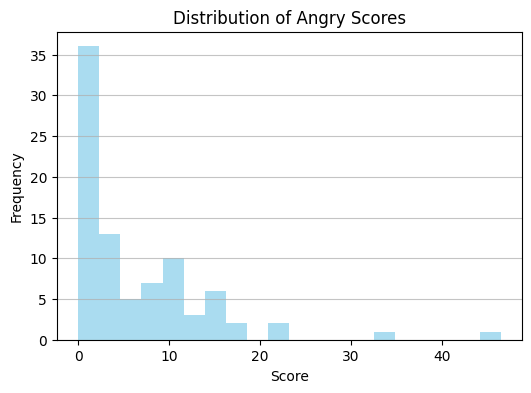

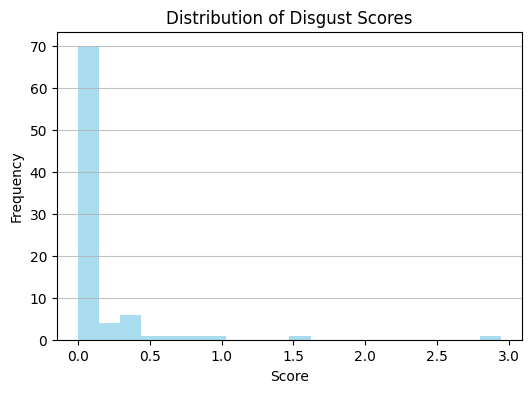

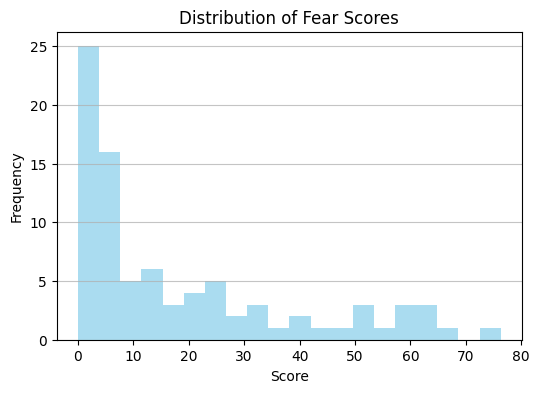

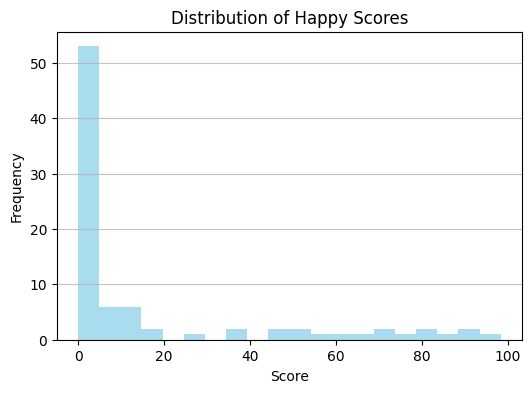

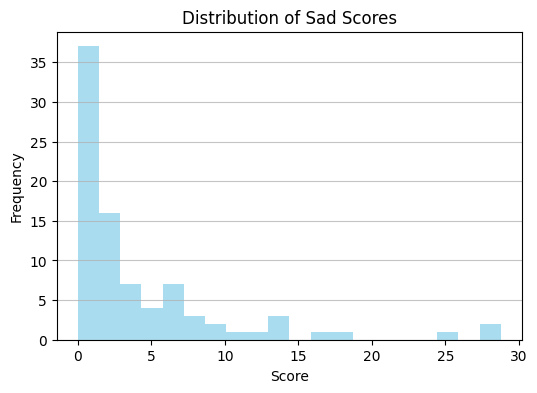

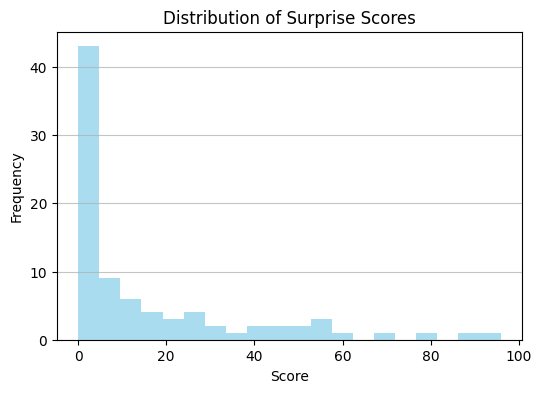

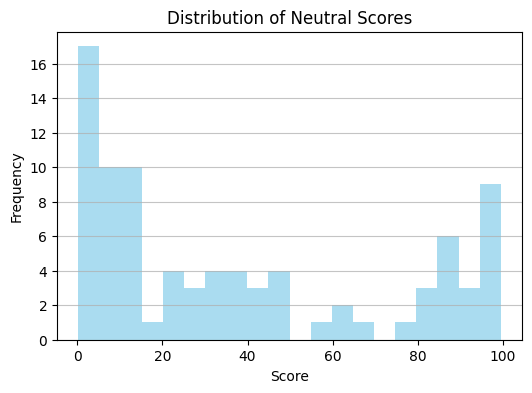

In [5]:
# Create individual histograms for each emotion score
import matplotlib.pyplot as plt
import seaborn as sns
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for emotion in emotions:
    plt.figure(figsize=(6, 4))
    plt.hist(emotion_df[emotion], bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {emotion.capitalize()} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

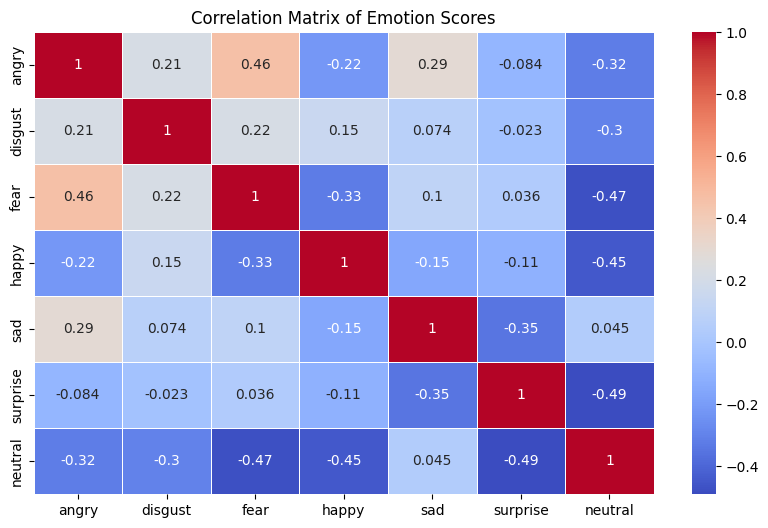

In [6]:
emotion_scores = emotion_df[['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']]
# Calculate the correlation matrix
correlation_matrix = emotion_scores.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Emotion Scores")
plt.show()

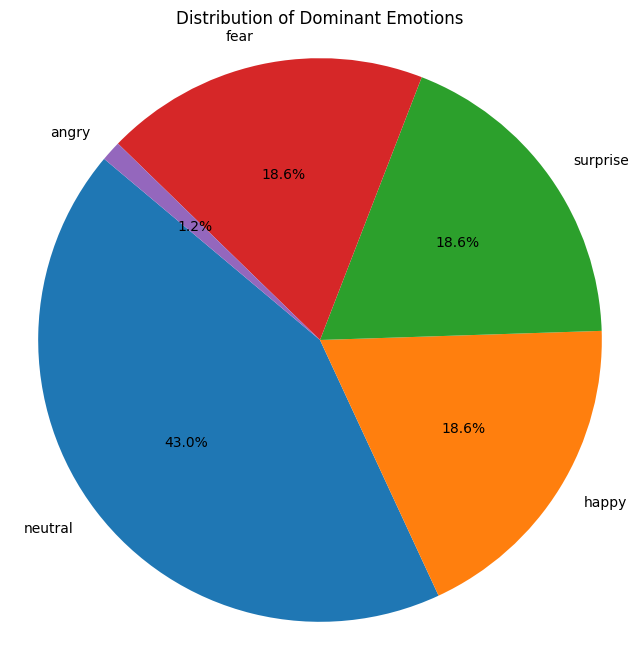

In [7]:
# Assuming you have already counted the occurrences of dominant emotions
dominant_emotion_counts = emotion_df['dominant_emotion'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_emotion_counts, labels=dominant_emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Emotions')

# Equal aspect ratio ensures that the pie chart is a circle.
plt.axis('equal')

plt.show()

In [8]:
gaze_df = pd.read_csv("gaze.csv")
gaze_df.head()

,movie_id,image_seq,gaze,blink,eye_offset
0,dfb0d746-609f-4dac-8e1d-c0325fb64394,1,1,0,-15.4688
1,dfb0d746-609f-4dac-8e1d-c0325fb64394,2,1,0,4.3447
2,dfb0d746-609f-4dac-8e1d-c0325fb64394,3,1,0,5.9378
3,dfb0d746-609f-4dac-8e1d-c0325fb64394,4,1,0,-17.5304
4,dfb0d746-609f-4dac-8e1d-c0325fb64394,5,1,0,13.5553


In [9]:
# Calculate summary statistics
summary_stats_gaze = gaze_df[['gaze', 'blink', 'eye_offset']].describe()

# Print the summary statistics
print(summary_stats_gaze)

            gaze      blink  eye_offset
count  86.000000  86.000000   86.000000
mean    0.965116   0.023256    8.586290
std     0.184561   0.151599    9.477504
min     0.000000   0.000000  -17.530400
25%     1.000000   0.000000    3.462100
50%     1.000000   0.000000    9.297250
75%     1.000000   0.000000   14.247350
max     1.000000   1.000000   37.400600


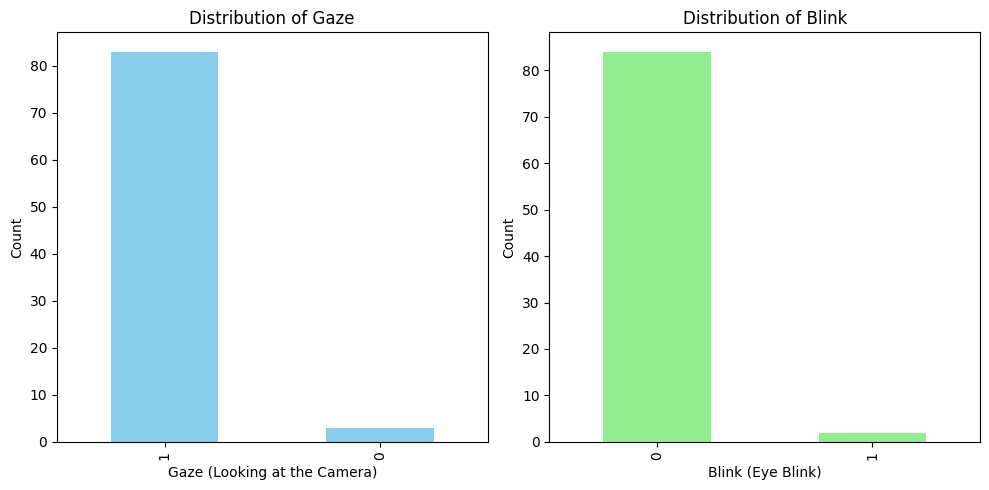

In [10]:
plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_df['gaze'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Gaze (Looking at the Camera)')
plt.ylabel('Count')
plt.title('Distribution of Gaze')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_df['blink'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Blink (Eye Blink)')
plt.ylabel('Count')
plt.title('Distribution of Blink')

plt.tight_layout()
plt.show()

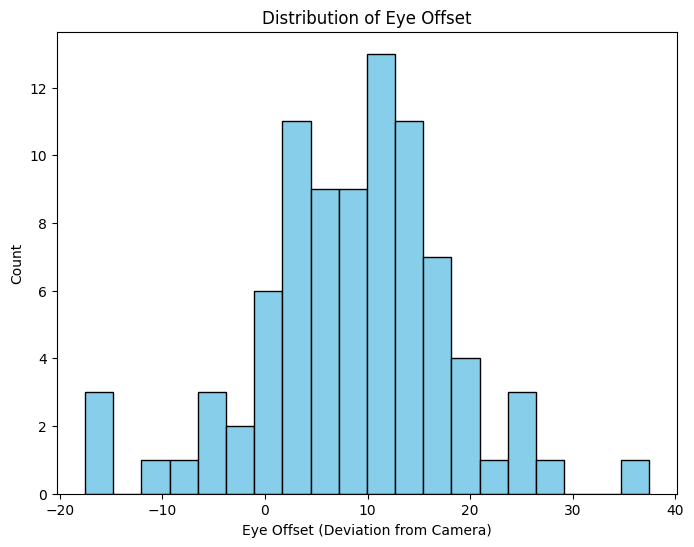

In [11]:
# Plotting the distribution of eye_offset
plt.figure(figsize=(8, 6))
plt.hist(gaze_df['eye_offset'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Eye Offset (Deviation from Camera)')
plt.ylabel('Count')
plt.title('Distribution of Eye Offset')
plt.show()

In [12]:
metadata_df = pd.read_csv("metadata.csv")
metadata_df.head()

,movie_id,image_seq,participant_id,elapsed_time,upload_time,distance
0,dfb0d746-609f-4dac-8e1d-c0325fb64394,0,deb4a835-b82f-4f3d-b2c4-77c66eca7752,1.0,2023-09-17 07:44:51,0.0
1,dfb0d746-609f-4dac-8e1d-c0325fb64394,1,deb4a835-b82f-4f3d-b2c4-77c66eca7752,2.0,2023-09-17 07:44:51,0.0
2,dfb0d746-609f-4dac-8e1d-c0325fb64394,2,deb4a835-b82f-4f3d-b2c4-77c66eca7752,3.0,2023-09-17 07:44:51,0.0
3,dfb0d746-609f-4dac-8e1d-c0325fb64394,3,deb4a835-b82f-4f3d-b2c4-77c66eca7752,4.0,2023-09-17 07:44:51,0.0
4,dfb0d746-609f-4dac-8e1d-c0325fb64394,4,deb4a835-b82f-4f3d-b2c4-77c66eca7752,5.0,2023-09-17 07:44:51,0.0


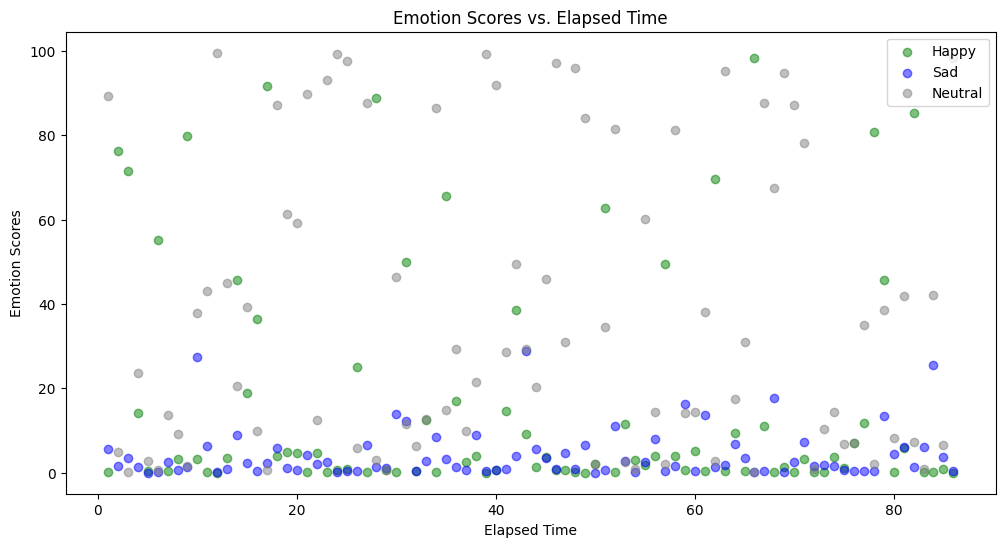

In [13]:
merged_df = pd.merge(metadata_df, emotion_df, on='image_seq')

# Plotting the relationship between elapsed_time and emotion scores
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['elapsed_time'], merged_df['happy'], alpha=0.5, label='Happy', color='green')
plt.scatter(merged_df['elapsed_time'], merged_df['sad'], alpha=0.5, label='Sad', color='blue')
plt.scatter(merged_df['elapsed_time'], merged_df['neutral'], alpha=0.5, label='Neutral', color='gray')
plt.xlabel('Elapsed Time')
plt.ylabel('Emotion Scores')
plt.legend()
plt.title('Emotion Scores vs. Elapsed Time')
plt.show()

In [14]:
merged_emotion_gaze_df = pd.merge(emotion_df, gaze_df, on='image_seq')

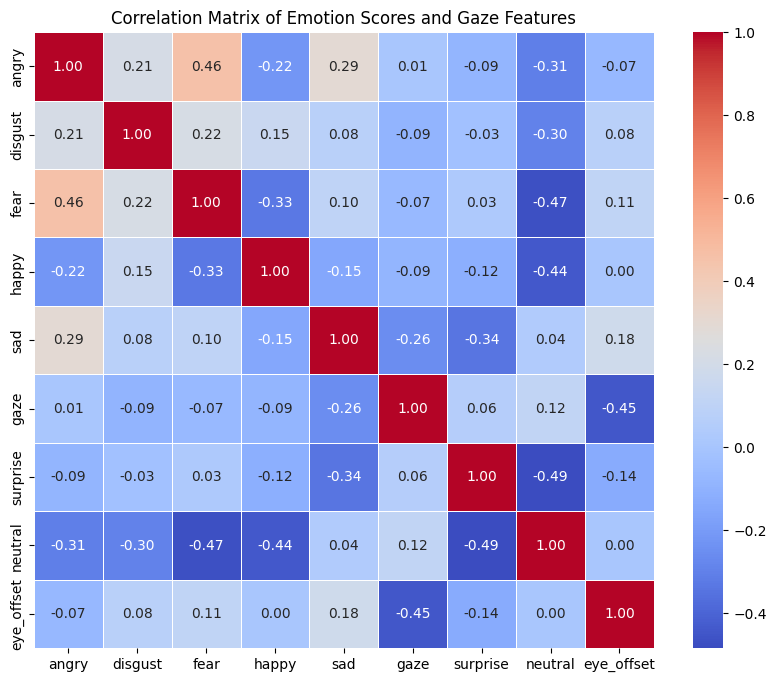

In [15]:
# Calculate the correlation matrix
correlation_matrix = merged_emotion_gaze_df[['angry', 'disgust', 'fear', 'happy', 'sad','gaze', 'surprise', 'neutral', 'eye_offset']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Emotion Scores and Gaze Features')
plt.show()

In [16]:
transcript_scores_df = pd.read_csv("9.csv")
transcript_scores_df.head()

,id,seek,start,end,text,tokens,temperature,avg_logprob,compression_ratio,no_speech_prob,positive,negative,neutral,confident,hesitant,concise,enthusiastic,speech_speed
0,0,0,0.0,4.0,"Hello, myself is Alexander Smith. I am a firs...","[50364, 2425, 11, 2059, 307, 4832, 282, 13550,...",0.0,-0.314641,1.629393,0.505501,0.529112,0.170376,0.300512,0.828881,0.904767,0.701876,0.644033,4.000000
1,1,0,4.0,10.0,I come from a suburban part of India. I did m...,"[50564, 286, 808, 490, 257, 40138, 644, 295, 5...",0.0,-0.314641,1.629393,0.505501,0.487809,0.257262,0.254929,0.709294,0.834372,0.578688,0.347600,3.500000
2,2,0,10.0,16.0,During my M.Tech I co-founded an Agritech sta...,"[50864, 6842, 452, 376, 13, 36050, 286, 598, 1...",0.0,-0.314641,1.629393,0.505501,0.643916,0.207910,0.148174,0.517857,0.658954,0.532680,0.246040,3.333333
3,3,0,16.0,25.0,"Lastly, I was working in an Agritech farm. I ...","[51164, 18072, 11, 286, 390, 1364, 294, 364, 2...",0.0,-0.314641,1.629393,0.505501,0.460375,0.315276,0.224349,0.492958,0.822160,0.725939,0.271417,3.444444
4,4,2500,25.0,31.0,I am passionate about entrepreneurship and I ...,"[50364, 286, 669, 11410, 466, 26582, 293, 286,...",0.0,-0.320510,1.613043,0.902595,0.734722,0.121449,0.143828,0.657750,0.331903,0.186974,0.995264,4.000000


In [17]:
# Select relevant columns for summary statistics
numerical_scores = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']]

# Calculate summary statistics
summary_stats_scores = numerical_scores.describe()

# Print the summary statistics
print(summary_stats_scores)

       positive  negative   neutral  confident  hesitant   concise  \
count  9.000000  9.000000  9.000000   9.000000  9.000000  9.000000   
mean   0.617353  0.223949  0.158699   0.591842  0.538732  0.381809   
std    0.277458  0.225380  0.094944   0.260862  0.354912  0.262527   
min    0.066446  0.006704  0.007567   0.013361  0.027346  0.016398   
25%    0.487809  0.121449  0.140751   0.517857  0.242967  0.186974   
50%    0.643916  0.170376  0.148174   0.605490  0.658954  0.302920   
75%    0.734722  0.257262  0.224349   0.709294  0.834372  0.578688   
max    0.985729  0.762480  0.300512   0.937101  0.904767  0.725939   

       enthusiastic  speech_speed  
count      9.000000      9.000000  
mean       0.505152      3.329938  
std        0.396666      0.634821  
min        0.004274      2.166667  
25%        0.246040      3.000000  
50%        0.347600      3.444444  
75%        0.947033      3.900000  
max        0.995264      4.000000  


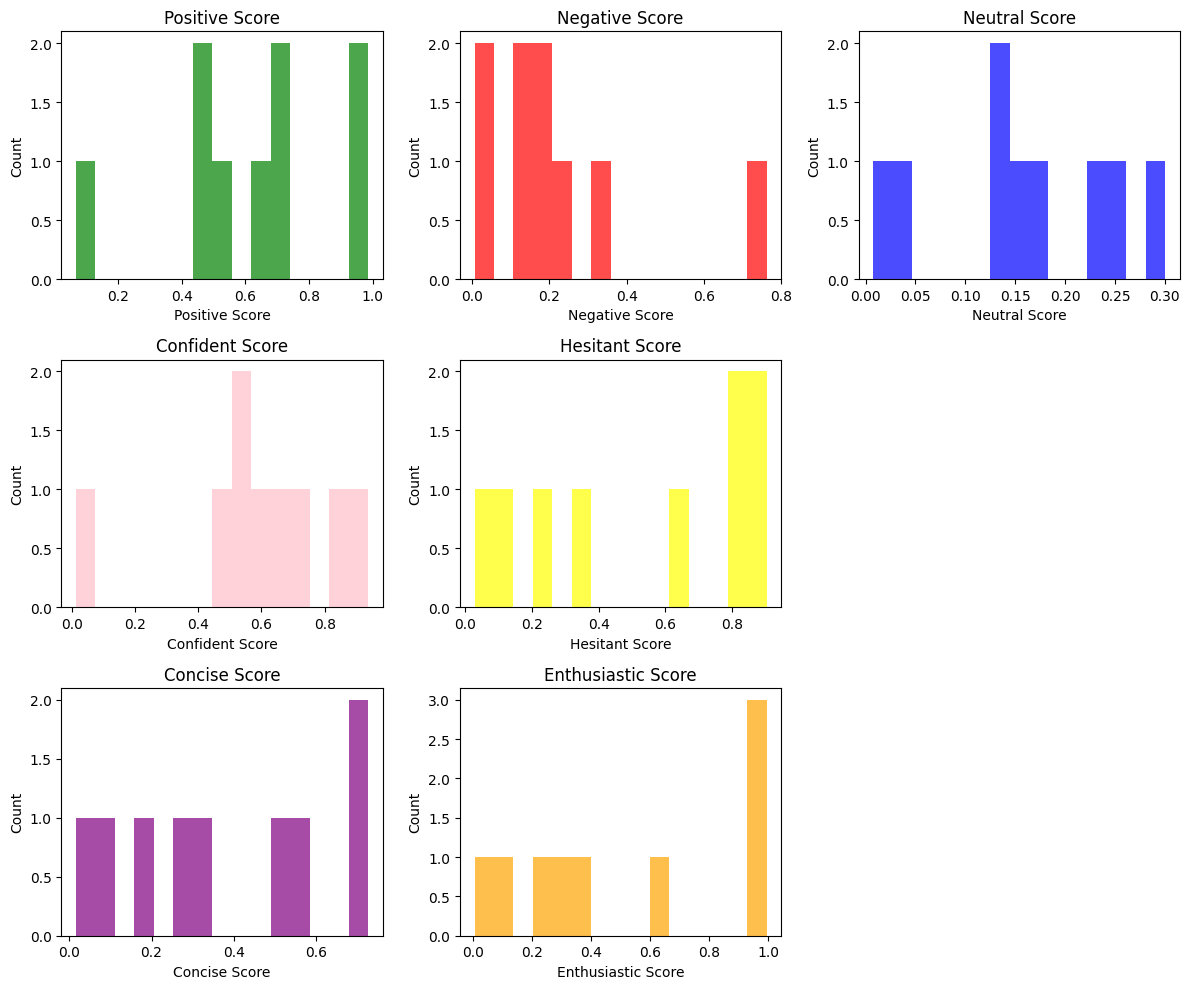

In [18]:
import matplotlib.pyplot as plt

# Create a figure with three rows and three columns
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Distribution of positive score
axes[0, 0].hist(transcript_scores_df['positive'], bins=15, color='green', alpha=0.7)
axes[0, 0].set_xlabel('Positive Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Positive Score')

# Distribution of negative score
axes[0, 1].hist(transcript_scores_df['negative'], bins=15, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Negative Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Negative Score')

# Distribution of neutral score
axes[0, 2].hist(transcript_scores_df['neutral'], bins=15, color='blue', alpha=0.7)
axes[0, 2].set_xlabel('Neutral Score')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Neutral Score')

# Distribution of confident score
axes[1, 0].hist(transcript_scores_df['confident'], bins=15, color='pink', alpha=0.7)
axes[1, 0].set_xlabel('Confident Score')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Confident Score')

# Distribution of hesitant score
axes[1, 1].hist(transcript_scores_df['hesitant'], bins=15, color='yellow', alpha=0.7)
axes[1, 1].set_xlabel('Hesitant Score')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Hesitant Score')

# Distribution of concise score
axes[2, 0].hist(transcript_scores_df['concise'], bins=15, color='purple', alpha=0.7)
axes[2, 0].set_xlabel('Concise Score')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Concise Score')

# Distribution of enthusiastic score
axes[2, 1].hist(transcript_scores_df['enthusiastic'], bins=15, color='orange', alpha=0.7)
axes[2, 1].set_xlabel('Enthusiastic Score')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Enthusiastic Score')

# Remove the empty subplots
fig.delaxes(axes[1, 2])
fig.delaxes(axes[2, 2])

# Ensure tight layout
plt.tight_layout()

# Show the plots
plt.show()

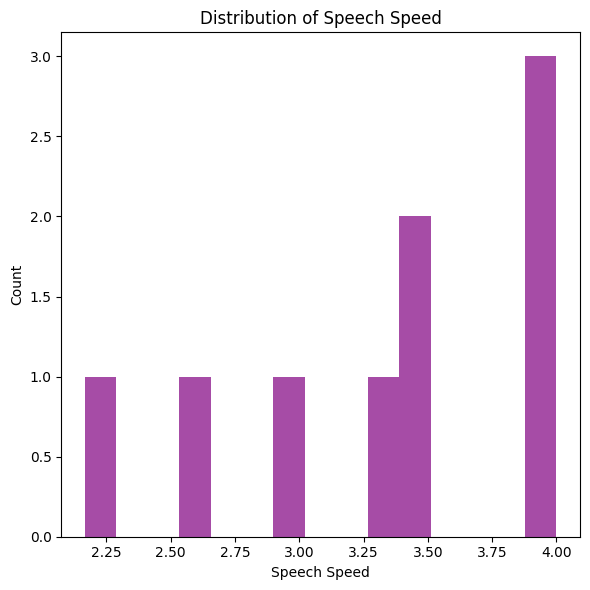

In [19]:
# Plotting the distribution of speech_speed
plt.figure(figsize=(6, 6))

# Distribution of speech_speed
plt.hist(transcript_scores_df['speech_speed'], bins=15, color='purple', alpha=0.7)
plt.xlabel('Speech Speed')
plt.ylabel('Count')
plt.title('Distribution of Speech Speed')

plt.tight_layout()
plt.show()

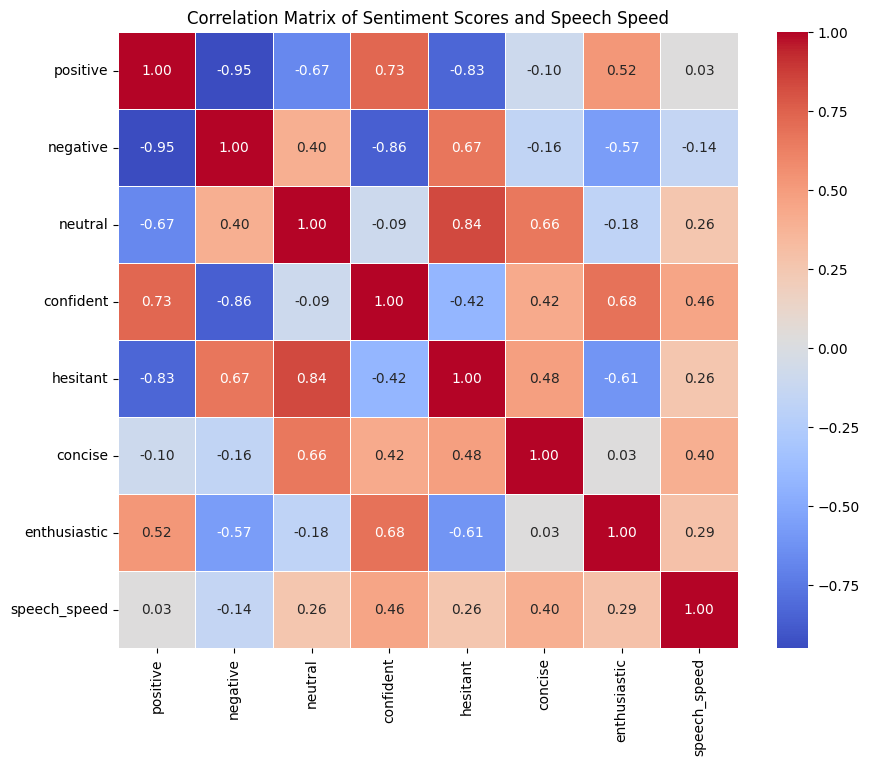

In [20]:
# Calculate the correlation matrix
correlation_matrix = transcript_scores_df[['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic', 'speech_speed']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Sentiment Scores and Speech Speed')
plt.show()

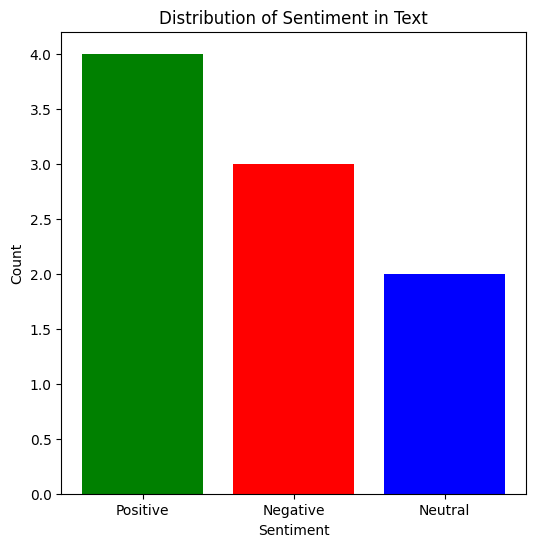

In [21]:
from textblob import TextBlob

# Function to perform sentiment analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
transcript_scores_df['sentiment'] = transcript_scores_df['text'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = transcript_scores_df['sentiment'].value_counts()

# Plot the distribution of sentiments
plt.figure(figsize=(6, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment in Text')
plt.show()

In [23]:
# Assuming 'transcript_scores_df' is the DataFrame containing the transcript scores dataset
# Replace it with the actual DataFrame name you have

# Create a function to find the dominant quality
def find_dominant_quality(row):
    qualities = ['positive', 'negative', 'neutral', 'confident', 'hesitant', 'concise', 'enthusiastic']
    max_quality = qualities[0]
    max_score = row[max_quality]

    for quality in qualities:
        if row[quality] > max_score:
            max_score = row[quality]
            max_quality = quality

    return max_quality

# Apply the function to create a new column 'dominant_quality'
transcript_scores_df['dominant_quality'] = transcript_scores_df.apply(find_dominant_quality, axis=1)

# Display the DataFrame with the 'dominant_quality' column
print(transcript_scores_df[['text', 'dominant_quality']])


                                                text dominant_quality
0   Hello, myself is Alexander Smith. I am a firs...         hesitant
1   I come from a suburban part of India. I did m...         hesitant
2   During my M.Tech I co-founded an Agritech sta...         hesitant
3   Lastly, I was working in an Agritech farm. I ...         hesitant
4   I am passionate about entrepreneurship and I ...     enthusiastic
5   As I am besides you, concentrated on the fact...         hesitant
6   So, having a deep learning algorithm that can...         positive
7   As we know that the coming age is going to be...     enthusiastic
8   who is always interested in working in the ch...     enthusiastic


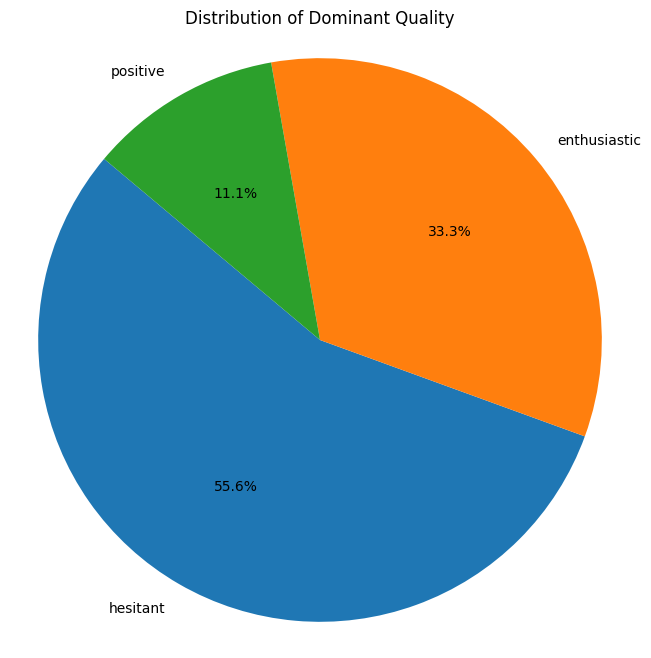

In [24]:
import matplotlib.pyplot as plt

# Assuming 'transcript_scores_df' is the DataFrame with the 'dominant_quality' column
# Replace it with the actual DataFrame name you have

# Count the occurrences of each dominant quality
dominant_quality_counts = transcript_scores_df['dominant_quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(dominant_quality_counts, labels=dominant_quality_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dominant Quality')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [25]:
emotion_percentage_dict = dict(zip(dominant_emotion_counts.index, dominant_emotion_counts / dominant_emotion_counts.sum()))
emotion_percentage_dict

{'neutral': 0.43023255813953487,
 'happy': 0.18604651162790697,
 'surprise': 0.18604651162790697,
 'fear': 0.18604651162790697,
 'angry': 0.011627906976744186}

In [26]:
emotion_percentage_dict['disgust']=0
emotion_percentage_dict['sad']=0

In [27]:
def calculate_emotion_score(emotion_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in emotion_df.columns:
            if emotion in ['angry', 'disgust', 'sad', 'fear']:
                emotion_score -= emotion_df[emotion].mean() * weight
            else:
                emotion_score += emotion_df[emotion].mean() * weight

    return emotion_score

In [28]:
emotion_score = calculate_emotion_score(emotion_df, emotion_percentage_dict)
print(f"Emotion Score: {emotion_score}")

Emotion Score: 18.916465341527854


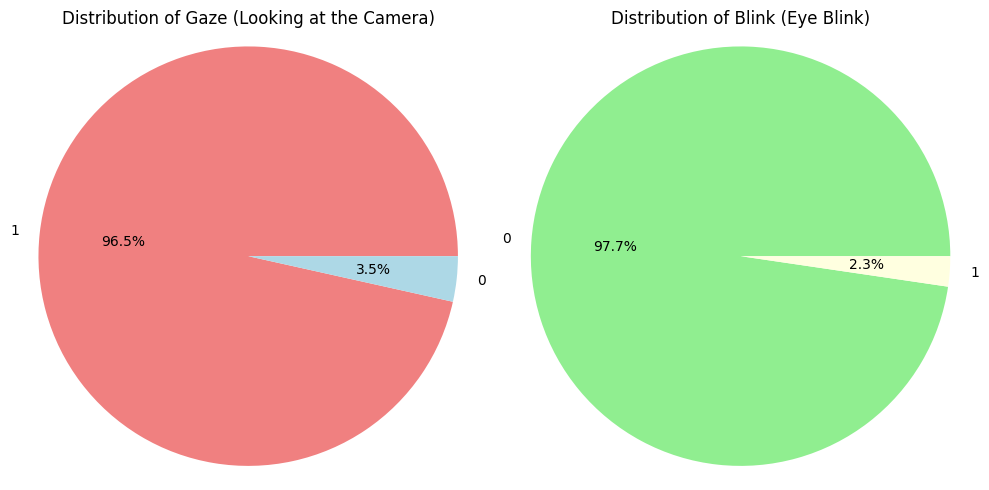

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Distribution of gaze
plt.subplot(1, 2, 1)
gaze_gaze_counts = gaze_df['gaze'].value_counts()
plt.pie(gaze_gaze_counts, labels=gaze_gaze_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Gaze (Looking at the Camera)')

# Distribution of blink
plt.subplot(1, 2, 2)
gaze_blink_counts = gaze_df['blink'].value_counts()
plt.pie(gaze_blink_counts, labels=gaze_blink_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightyellow'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Blink (Eye Blink)')

plt.tight_layout()
plt.show()

In [30]:
def calculate_offset_score(gaze_df):
    # Calculate the Offset Score based on the gaze data

    # Calculate the mean and median of absolute values of offset
    mean_offset = gaze_df['eye_offset'].abs().mean()
    median_offset = gaze_df['eye_offset'].abs().median()

    # Calculate the Offset Score as a weighted average
    offset_score = (mean_offset + median_offset) / 2

    return offset_score/90

In [31]:
def calculate_blink_score(gaze_df):
    # Calculate the Blink Score based on the provided formula

    # Calculate the mean of gaze values
    mean_blink = gaze_df['gaze'].mean()

    # Calculate the absolute difference between blink and no blink, then take the mean
    abs_diff = (gaze_df['blink'] - 1).abs().mean()

    # Calculate the Blink Score
    blink_score = 1 - mean_blink - abs_diff

    return blink_score

In [32]:
Offset_and_Blink_Score = calculate_blink_score(gaze_df) + calculate_offset_score(gaze_df)
Offset_and_Blink_Score

-0.8264552260981912

In [33]:
sentiment_percentage_dict = dict(zip(dominant_quality_counts.index, dominant_quality_counts / dominant_quality_counts.sum()))
sentiment_percentage_dict

{'hesitant': 0.5555555555555556,
 'enthusiastic': 0.3333333333333333,
 'positive': 0.1111111111111111}

In [34]:
sentiment_percentage_dict['confident']=0
sentiment_percentage_dict['concise']=0
sentiment_percentage_dict['neutral']=0
sentiment_percentage_dict['negative']=0
sentiment_percentage_dict

{'hesitant': 0.5555555555555556,
 'enthusiastic': 0.3333333333333333,
 'positive': 0.1111111111111111,
 'confident': 0,
 'concise': 0,
 'neutral': 0,
 'negative': 0}

In [35]:
def sentiment_score(transcript_scores_df, emotion_weights):
    # Calculate the Emotion Score based on the provided weights and emotion data
    # emotion_weights should be a dictionary containing weights for each emotion

    # Initialize the Emotion Score
    emotion_score = 0.0

    # Calculate the weighted sum of emotions, subtracting for negative emotions
    for emotion, weight in emotion_weights.items():
        if emotion in transcript_scores_df.columns:
            if emotion in ['hesitant', 'negative']:
                emotion_score -= transcript_scores_df[emotion].mean() * weight
            else:
                emotion_score += transcript_scores_df[emotion].mean() * weight

    return emotion_score

In [36]:
Sentiment_score = sentiment_score(transcript_scores_df, sentiment_percentage_dict)
Sentiment_score

-0.06231667296845972

In [37]:
def calculate_speech_speed_closeness(transcript_scores_df, target_speech_speed=3.5):
    # Calculate the closeness of speech speed to the target value (default: 3.5)

    # Ensure that 'speech_speed' is a column in the DataFrame
    if 'speech_speed' not in transcript_scores_df.columns:
        return None  # If 'speech_speed' column is not present

    # Calculate the absolute difference between speech speed and the target
    transcript_scores_df['speech_speed_difference'] = abs(transcript_scores_df['speech_speed'] - target_speech_speed)

    # Calculate the mean of absolute differences
    mean_difference = transcript_scores_df['speech_speed_difference'].mean()

    # The closer to zero the mean difference is, the closer the speech speed is to the target
    return mean_difference


In [38]:
# Calculate speech speed closeness for your DataFrame
closeness_score = calculate_speech_speed_closeness(transcript_scores_df)

# Print the closeness score
print("Speech Speed Closeness Score:", closeness_score)

Speech Speed Closeness Score: 0.48117283950617284


In [39]:
Total_Score = emotion_score + 10*Sentiment_score + closeness_score*5+ Offset_and_Blink_Score
Total_Score

19.87270758327593